# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [2]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "data/train.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)


X_train, y_train = train['features'], train['labels']

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [3]:
n_train = len(X_train)
n_classes = len(set(y_train))
image_shape = X_train[0].shape

print("Number of training examples =", n_train)
print("Number of classes =", n_classes)
print("Image data shape =", image_shape)

Number of training examples = 39209
Number of classes = 43
Image data shape = (32, 32, 3)


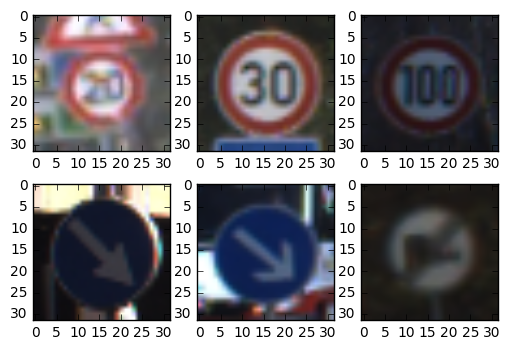

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure()
fig.add_subplot(231)
plt.imshow(X_train[0])
fig.add_subplot(232)
plt.imshow(X_train[500])
fig.add_subplot(233)
plt.imshow(X_train[11600])
fig.add_subplot(234)
plt.imshow(X_train[-3010])
fig.add_subplot(235)
plt.imshow(X_train[-2050])
fig.add_subplot(236)
plt.imshow(X_train[-80])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Merge
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, n_classes)
X_train = X_train.astype('float32')
X_train /= 255


Using TensorFlow backend.


In [6]:
from sklearn.model_selection import train_test_split
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

datagen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.03,
    height_shift_range=0.03)


In [7]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint
model.fit_generator(generator=datagen.flow(X_tr, Y_tr, batch_size=35),
          samples_per_epoch=X_tr.shape[0],
          nb_epoch=35,
          validation_data=(X_val, Y_val),
          callbacks=[ModelCheckpoint('model.h5',save_best_only=True)])

Epoch 1/35
31367/31367 [==============================] - 12s - loss: 2.4234 - acc: 0.3024 - val_loss: 0.7899 - val_acc: 0.7780
Epoch 2/35
31367/31367 [==============================] - 9s - loss: 0.5653 - acc: 0.8142 - val_loss: 0.1122 - val_acc: 0.9695
Epoch 3/35
31367/31367 [==============================] - 9s - loss: 0.2560 - acc: 0.9155 - val_loss: 0.0520 - val_acc: 0.9862
Epoch 4/35
31367/31367 [==============================] - 9s - loss: 0.1743 - acc: 0.9454 - val_loss: 0.0375 - val_acc: 0.9901
Epoch 5/35
31367/31367 [==============================] - 9s - loss: 0.1367 - acc: 0.9583 - val_loss: 0.0271 - val_acc: 0.9929
Epoch 6/35
31367/31367 [==============================] - 9s - loss: 0.1075 - acc: 0.9668 - val_loss: 0.0199 - val_acc: 0.9941
Epoch 7/35
31367/31367 [==============================] - 9s - loss: 0.0954 - acc: 0.9708 - val_loss: 0.0210 - val_acc: 0.9945
Epoch 8/35
31367/31367 [==============================] - 9s - loss: 0.0898 - acc: 0.9724 - val_loss: 0.0162 -

In [8]:
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
model.load_weights("model.h5")
X_test, y_test = test['features'], test['labels']

Y_test = np_utils.to_categorical(y_test, n_classes)
X_test = X_test.astype('float32')
X_test /= 255

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0884608608286
Test accuracy: 0.98060174196


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

I converted the feature data to float32 and one hot encoded the labels. I also jittered the images to create multiple perspectives of the feature data allowing for a more generalized model.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I used scit-kit learns train_test_split function to split 20% of the training data into a validation set and then kept the training and testing data seperate. I technically generated data by jittering the images, and I did this for the reasons stated in the answer to question 1.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I tested multiple architechture styles, and the most optimal solution was the one provided as an example in the Keras repo for CIFAR-10 (https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py).

The first layer has 32 3x3 filters, followed by a relu activation function, another layer with 32 3x3 filters, folowed by another activation function. It then has a 2x2 max pooling layer and a dropout layer. This architechture repeats one more time. Then the input is flattened. Followed by a fully connected layer with an output dimention of 512. Followed by a relu activation function, a dropout layer, a fully connected layer with an output dimension with the number of classes in the label. Followed by softmax.

It trained relatively fast compared to the two previous architechtures I tried to come up with, and it provided good results in and out of sample (~98% for both).

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the adam optimizer, a batch size of 35, and trained with 35 epochs. Dropout for each layer of the network varied and I used what was recommended by the Keras repo.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I first tried to use a VGG16 model with predefined weights, and then tried to finetune the model for this dataset. However, the training time was very slow, and I received poor results. I could not determine why this was the case. I then tried building an architechture that was similar to the one provided in the academic paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks". However, I felt like that there wasn't sufficient enough information provided in the paper to recreate the architechture. I then decided to use the Keras example architechture for training on the CIFAR-10 dataset. It turned out to work well on this dataset as well.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

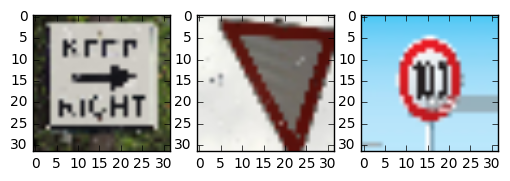

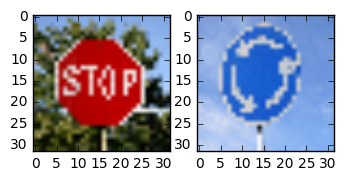

In [19]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline

path_list = glob.glob('new_images/*.png')
images = [load_img(filename) for filename in path_list]

images = [image.resize((32,32)) for image in images]

fig = plt.figure()
fig.add_subplot(131)
plt.imshow(images[0])
fig.add_subplot(132)
plt.imshow(images[1])
fig.add_subplot(133)
plt.imshow(images[2])

fig = plt.figure()
fig.add_subplot(131)
fig.add_subplot(131)
plt.imshow(images[3])
fig.add_subplot(132)
plt.imshow(images[4])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

Two of the signs are American and not german. However, the images are close enough to the german signs that it should guess correctly. (stop sign, keep right)

In [22]:
X = np.array([np.array(image).astype('float32')/255 for image in images])
preds = model.predict(X)

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The model was able to correctly guess all capture pictures. Live camera stream was not tested.

[{12: 0.87700701}, {13: 0.99999952}, {7: 0.65676087}, {14: 1.0}, {40: 1.0}]


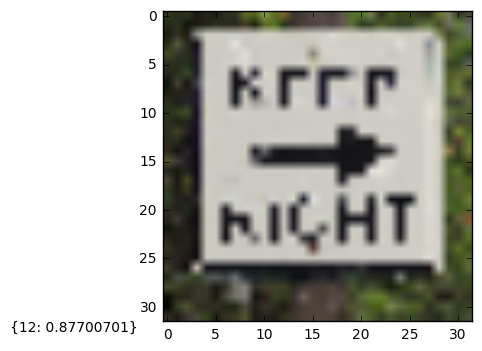

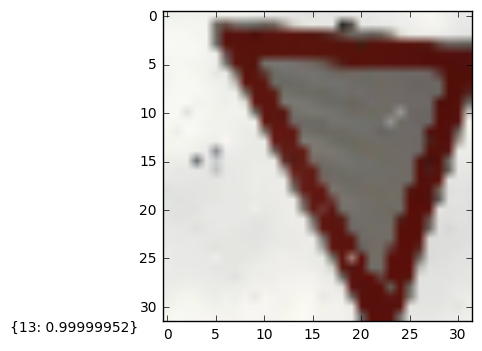

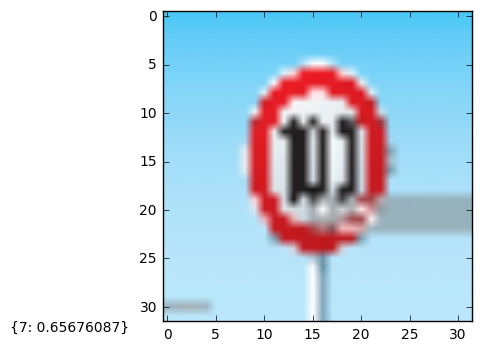

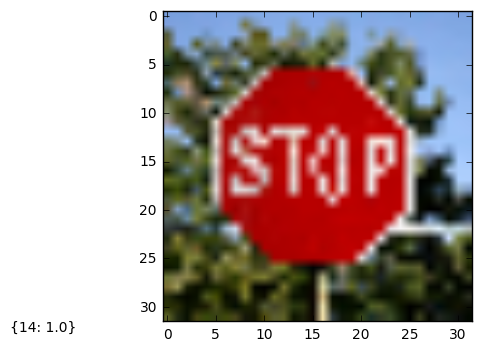

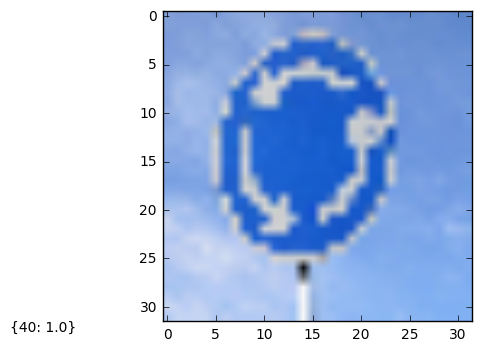

In [46]:
caption = []
for (image, (answer, confs)) in zip(images, zip(list(map(np.argmax, preds)), preds)):
    caption.append({answer:confs[answer]})

for cap, image in zip(caption, images):
    fig = plt.figure()
    fig.text(0,.1, cap)
    plt.imshow(image)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

Three of the five images had a 100% confidence score while the other two had scores above 50%. All images were classified correctly.

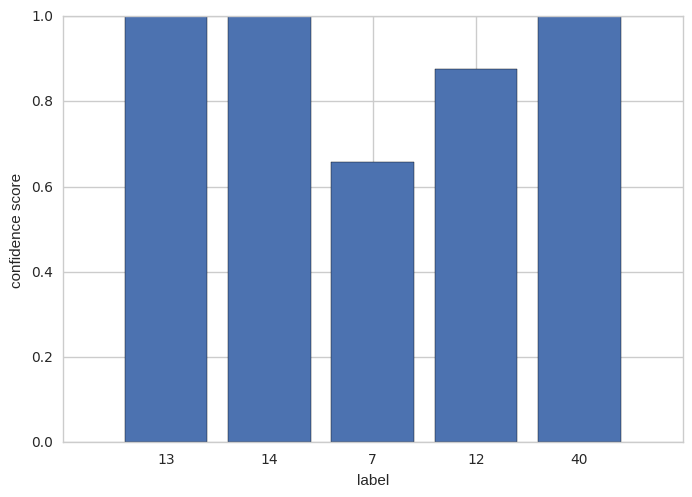

In [59]:
import matplotlib.pyplot as plt
data = {}
for (img, (answer, confs)) in zip(small_images, zip(list(map(np.argmax, preds)), preds)):
    data.update({str(answer):confs[answer]})
plt.bar(range(len(data)), data.values(), align='center')
plt.xticks(range(len(data)), data.keys())
plt.ylabel('confidence score')
plt.xlabel('label')
plt.show()

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
I acquired images through Google search, resized them, converted them to float32 and normalized them just like I did with the training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.